In [1]:
%matplotlib inline
from turbidity import *
from constants import *
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy.integrate import simps


In [2]:
### calculate size distribution given data from DLS

def lognormS(mn,sd):
    return np.log(mn/np.sqrt(1+(sd/mn)**2)), np.sqrt(np.log(1+(sd/mn)**2))

def p(x,mu,sigma):
    '''
    calculates probability of finding vesicle of a particular radius, working in microns
    '''
    return np.exp(-(np.log(x)-mu)**2/(2*sigma**2))/(x*sigma*np.sqrt(2*np.pi))


Text(0, 0.5, 'probability')

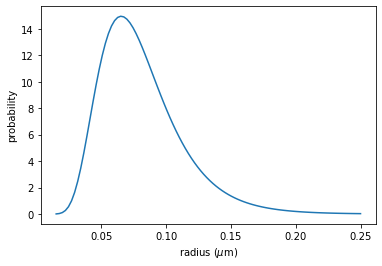

In [3]:
## testing function p from above: calculate distribution of radii given DLS values

radii = np.linspace(0.015,0.25,100) ## in microns

popc_m,popc_s = lognormS(0.081,0.032) # POPC vesicle average radius = 81 nm and standard deviation = 32 nm
plt.plot(radii,p(radii,popc_m,popc_s))
plt.xlabel('radius ($\mu$m)')
plt.ylabel('probability')

In [4]:
## define cost function

def cost(t, params):
    '''
    define cost function where the value being fitted for is the first variable
    '''
    c, mn, sd, R, data, wl = params
    return data-weighted_turb(t, c, mn, sd, R, wl)[0]


In [5]:
## now input your dataset as pandas dataframe
df = pd.read_csv('yourdata.csv')
WL = df['wavelength (nm)']*1e-3 ## define wavelength in microns
data_turbidity = (df['popc']-df['blank'])*2.3 ## blank sample and convert to turbidity

Text(0, 0.5, 'turbidity')

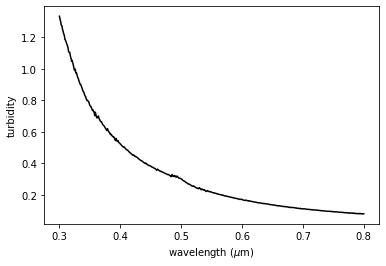

In [6]:
## plot your data to see if it looks ok. Make sure you convert between absorbance and turbidity
plt.plot(WL, data_turbidity, 'k')
plt.xlabel('wavelength ($\mu$m)')
plt.ylabel('turbidity')

In [7]:
thickness_guess = 2e-3 ## half thickness, working in microns
c = 1e-3 ## concentration in M
forwardcalc = weighted_turb(thickness_guess, c, popc_m, popc_s, np.linspace(0.015,0.2,10),wls=WL)

Text(0, 0.5, 'turbidity')

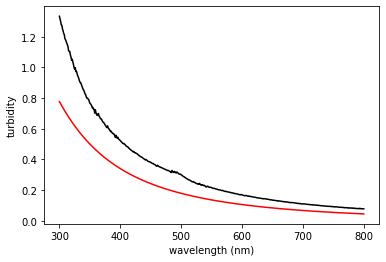

In [8]:
plt.plot(df['wavelength (nm)'],forwardcalc[0],'r')
plt.plot(df['wavelength (nm)'], data_turbidity, 'k')
plt.xlabel('wavelength (nm)')
plt.ylabel('turbidity')

In [9]:
## now try fitting with least squares

In [10]:
fit_attempt = scipy.optimize.leastsq(cost,thickness_guess,[c, popc_m, popc_s, np.linspace(0.015,0.2,10), data_turbidity, WL])

In [11]:
print('best-fit thickness is:', fit_attempt[0][0]*1e3*2, 'nm')

best-fit thickness is: 5.04484321742135 nm


Text(0, 0.5, 'turbidity')

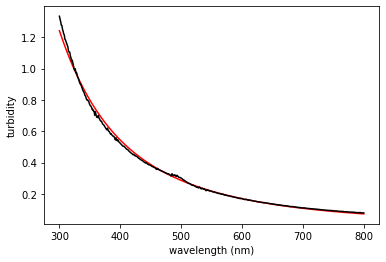

In [12]:
## plot best-fit results

forwardcalc = weighted_turb(fit_attempt[0][0], c, popc_m, popc_s, np.linspace(0.015,0.2,10),wls=WL)
plt.plot(df['wavelength (nm)'],forwardcalc[0],'r')
plt.plot(df['wavelength (nm)'], data_turbidity, 'k')
plt.xlabel('wavelength (nm)')
plt.ylabel('turbidity')